In [39]:
%pip install pandas matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [41]:
data = pd.read_csv("C:/Current_Projects/Visual Studio Code/git/SCT_ML_1/train.csv")
input =['Id','YearBuilt','YrSold','GrLivArea', 'BedroomAbvGr', 'FullBath']
output = 'SalePrice'

x = data[input]
y = data[output]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [42]:
model = LinearRegression()
model.fit(data[input],data[output])
y_val_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_val_pred)
rmse = mse ** 0.5
print(f'Validation RMSE: {rmse}')

Validation RMSE: 46956.64176361332


In [43]:
test_data = pd.read_csv("C:/Current_Projects/Visual Studio Code/git/SCT_ML_1/test.csv")
X_test = test_data[['Id','YearBuilt', 'YrSold', 'GrLivArea', 'BedroomAbvGr', 'FullBath']]
test_predictions = model.predict(X_test)

In [44]:
submissiondata = pd.DataFrame({
    'Id': test_data['Id'],
    'SalePrice': test_predictions
})
submissiondata.to_csv('submission.csv', index=False)
print('Submission file created: submission.csv')

Submission file created: submission.csv


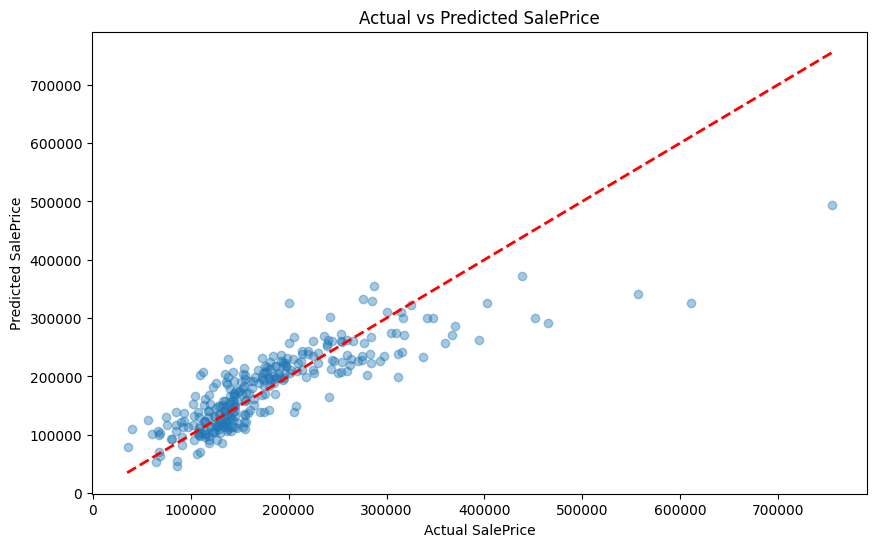

In [45]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_val_pred, alpha=0.4)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', linewidth=2)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice')
plt.show()